In [1]:
# viewBoundaryData.py
#
#
# Matt Churchfield
# National Renewable Energy Laboratory
# 7 June 2018
#



from inflowPrepMMC import inflowPrepMMC
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata




rootDir = '/projects/mmc/rthedin/OpenFOAM/rthedin-6/run/mmc_biglow/10_bdCoupling_30x30km/constant/boundaryDataTOOF'
boundaries = ['west']
fieldName = ['T','U']
pointsFileName = 'points'
time = 0







for i in range(len(boundaries)):
    boundaryDir = rootDir + '/' + boundaries[i] + '/'
    
    boundary = inflowPrepMMC()
    
    boundary.readBoundaryDataPoints(boundaryDir + pointsFileName)
    
    f = []
    nCmpt = []
    for j in range(len(fieldName)):
        f.append(boundary.readBoundaryDataField(boundaryDir + '/' + str(time) + '/' + fieldName[j]))
        nPoints,nCmpt_ = f[j].shape
        nCmpt.append(nCmpt_)

        cmpt = 0
        colormap = 'plasma'
        if (j == 1):
           #cmpt = 2
           #colormap = "RdBu_r"
            cmpt = 0
            colormap = "viridis"
        
        plt.figure(j,figsize=(10,7))
        plt.scatter(boundary.xyz[:,1], boundary.xyz[:,2], s=0.75, c=f[j][:,cmpt], cmap=colormap)
        plt.colorbar()
        plt.axis('equal')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.show()   

    


<Figure size 1000x700 with 2 Axes>

<Figure size 1000x700 with 2 Axes>

In [2]:
yi = 0.0
zi = np.arange(0,15000,10)
yi,zi = np.meshgrid(yi,zi)
nz,d = zi.shape


# interpolate
fi = []
for j in range(len(fieldName)):
    fi.append(griddata((boundary.xyz[:,1], boundary.xyz[:,2]),f[j][:,:],(yi,zi),method='linear'))

    
print(fi[0].shape)
print(fi[1].shape)
print(zi.shape)

ind = []
for i in range(len(fi[0])):
    if (np.isnan(fi[0][i])):
         ind.append(i)
        
        
    #print(zi.shape)
    #fi[j] = fi[j][:,0]
    #print(zi.shape)
print(ind)

zi.reshape((nz,))  
zi = np.delete(zi,ind)
zi = zi - zi[0]

for j in range(len(fi)):
    fi[j] = fi[j].reshape((nz,nCmpt[j]))
    fi[j] = np.delete(fi[j],ind,axis=0)

(1500, 1, 1)
(1500, 1, 3)
(1500, 1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


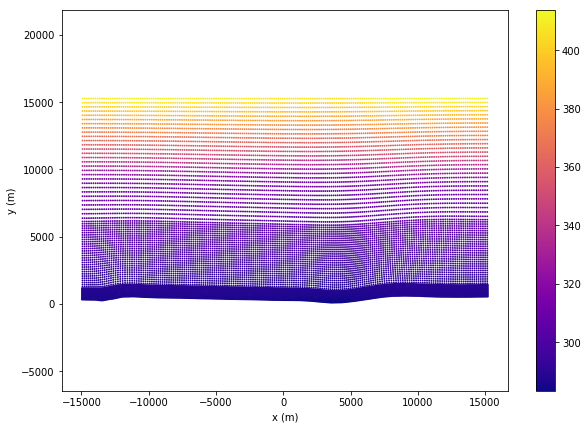

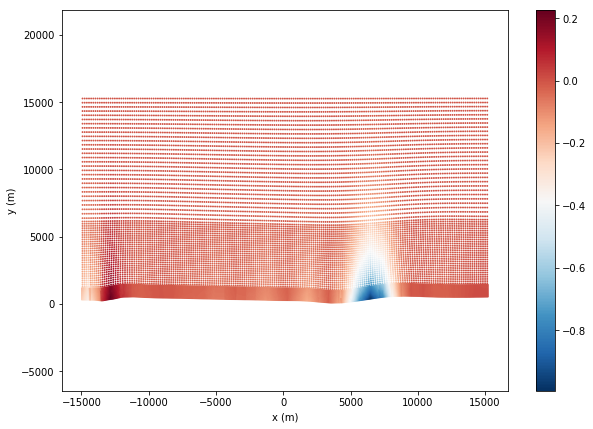

In [3]:
for j in range(len(f)):
    cmpt = 0
    colormap = 'plasma'
    if (j == 1):
        cmpt = 2
        colormap = "RdBu_r"
        #cmpt = 0
        #colormap = "viridis"
        
    plt.figure(j,figsize=(10,7))
    plt.scatter(boundary.xyz[:,1], boundary.xyz[:,2], s=0.75, c=f[j][:,cmpt], cmap=colormap)
    plt.colorbar()
    plt.axis('equal')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.show()   

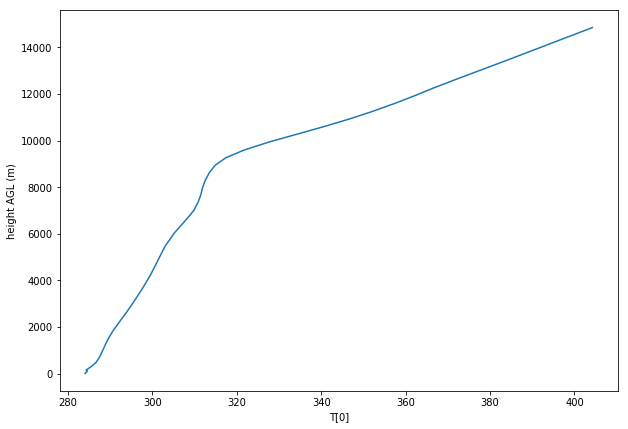

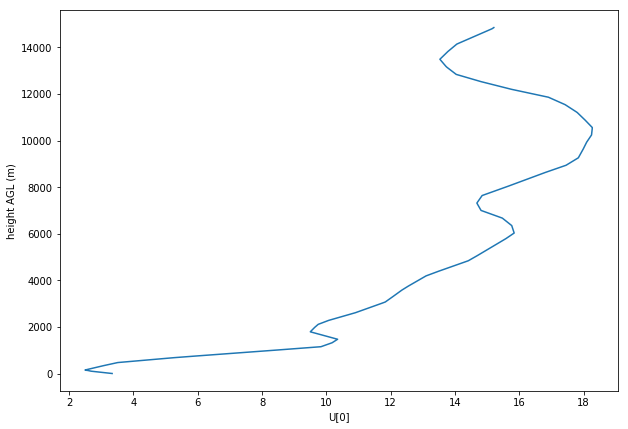

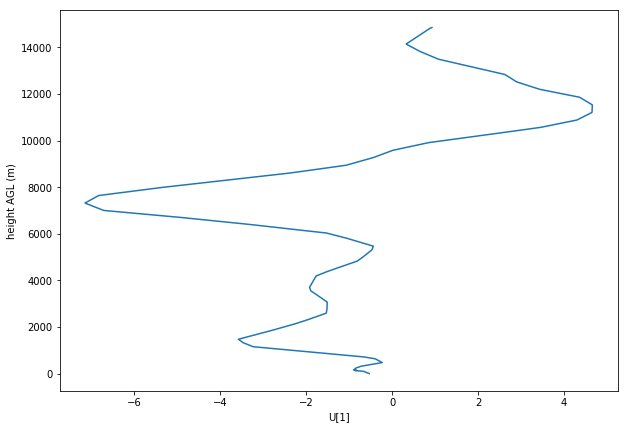

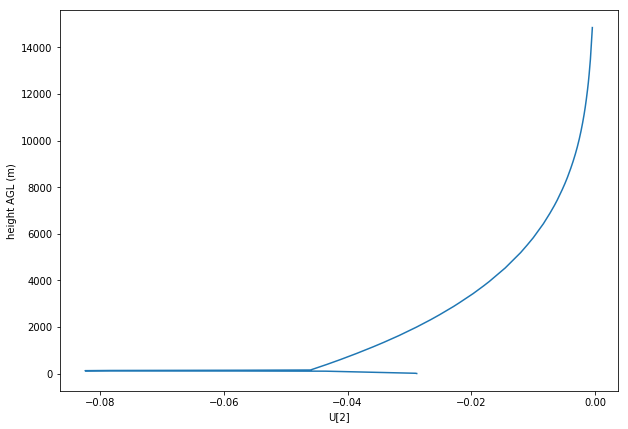

In [4]:
for j in range(len(fi)):
    for k in range(nCmpt[j]):
        plt.figure((10*j)+k,figsize=(10,7))
        plt.plot(fi[j][:,k],zi)
        #plt.ylim([0,6000])
        #plt.xlim([280,310])
        plt.ylabel('height AGL (m)')
        plt.xlabel(fieldName[j]+'['+str(k)+']')

In [14]:
points2D = np.zeros((2*len(zi),3))

f2D = []
f2D.append(np.zeros((2*len(zi),)))
f2D.append(np.zeros((2*len(zi),3)))



ii = 0
for i in range(len(zi)):
    points2D[ii][1] = -1000.0
    points2D[ii+1][1] =  1000.0
    points2D[ii][2] = zi[i]
    points2D[ii+1][2] =  zi[i]
    
    
    f2D[0][ii] = fi[0][i] 
    f2D[0][ii+1] = fi[0][i]
    
    for j in range(2):
        f2D[1][ii][j] = fi[1][i,j] 
        f2D[1][ii+1][j] = fi[1][i,j] 
    
    ii = ii + 2
    

print(np.size(f2D[1][0]))
      
boundary2D = inflowPrepMMC()
boundary2D.xyz = points2D

boundary2D.writeBoundaryDataPoints('test_xyz')
boundary2D.writeBoundaryDataField('test_T',f2D[0])
boundary2D.writeBoundaryDataField('test_U',f2D[1])


f = open('test_profile','w')
for i in range(len(zi)):
    f_line = '(' + \
             str(zi[i]) + ' ' + \
             str(fi[1][i,0]) + ' ' + \
             str(fi[1][i,1]) + ' ' + \
             str(fi[0][i,0]) + \
             ')' + '\n'
    f.write(f_line)
f.close()

3
[284.03833949 284.03833949 284.09107346 ... 404.08794131 404.24123723
 404.24123723]
[[ 3.3382909  -0.5327304   0.        ]
 [ 3.3382909  -0.5327304   0.        ]
 [ 3.27040595 -0.55178077  0.        ]
 ...
 [15.1995602   0.91352512  0.        ]
 [15.21066761  0.92626915  0.        ]
 [15.21066761  0.92626915  0.        ]]
